# Heart rate estimation from ECG signal

We will be analysing electrocardiograms to estimate the pusle rate.

In [1]:
# Import statements
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# Loading ecg
from scipy.misc import electrocardiogram
# You can also access it on https://physionet.org/

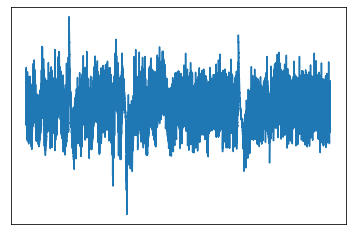

In [2]:
# Example of an ecg signal
ecg_whole = electrocardiogram()
plt.plot(ecg_whole)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)

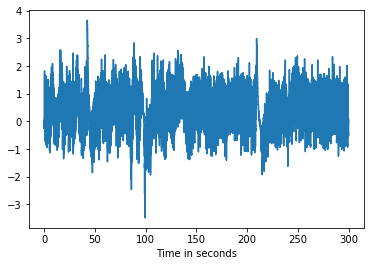

In [3]:
fs = 360 # sampling frequency in Hz

timestamps = np.arange(len(ecg_whole))*1/fs
plt.plot(timestamps, ecg_whole)
plt.xlabel('Time in seconds');

In [4]:
print("Signal length: {} minutes".format(np.round(timestamps[-1]/60)))

Signal length: 5.0 minutes


In [5]:
# We can trim the signal and use only the first part for the next steps
ecg = ecg_whole[0:1000]

## Heart Physiology
### Orgin of the ECG signal 

The heart is made up of four chambers: the left and right atria and the left and right ventricles. The cardiac myocytes that form the heart are electrically excitable. As we all know, the heart pump blood throughout the body to deliver oxygen and nutrients to the tissues and evacuate waste ans towins. This happens in response to electrical excitation. The heart beats in a regular rhythm and is controlled by the electrical conduction system which is composed of specialized cardiac myocytes, called pacemakers.  
The membrane of a cell has channels which open and closes according to the voltage. They allow ions to go accross the membrane.
When an electrical excitation arrives, it propagates through the rest of the membrane and changes the ion concentration. At rest, the interior of the cell is positively charged relative to the outside.   
The ECG wave results from the mouvement of ions across the membrane of the cardiac myocytes and can be measured using electrodes on the skin.




In [ ]:
img = plt.imread("data\heart.png") # Own work
plt.figure(figsize=(16, 9))
plt.imshow(img)
plt.title("Electrical Conduction System of the Heart")
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)

### QRS complex

The repeating pattern is the QRS complex followed by a P-wave.

In [ ]:
img = plt.imread("data\pattern-ecg.png") # Own work
plt.figure(figsize=(16, 9))
plt.imshow(img)
plt.title("ECG pattern")
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)

We can try to visualize a QRS complex.

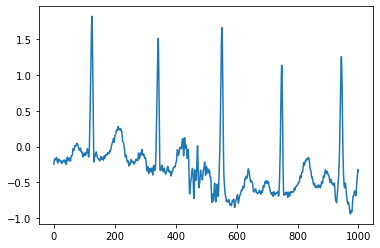

In [6]:
plt.plot(ecg);

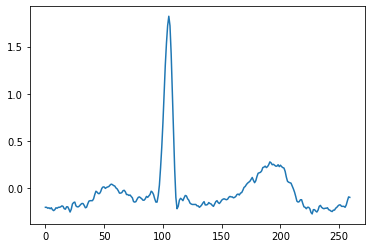

In [7]:
plt.plot(ecg[20:280]);

## Heart rate  estimation
### Simple peak detection

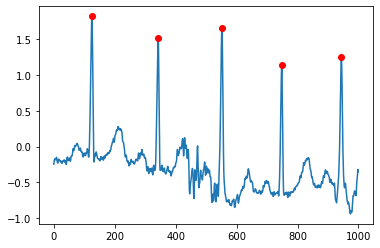

In [8]:
r_peaks, _ = find_peaks(ecg, distance = 150)
plt.plot(ecg)
plt.plot(r_peaks, ecg[r_peaks], 'ro')

In [9]:
print('Average heart rate {:.0f} bpm'.format(np.mean(60/np.diff(r_peaks/fs))))

Average heart rate 106 bpm


### Pan–Tompkins algorithm

Atrial fibrillation